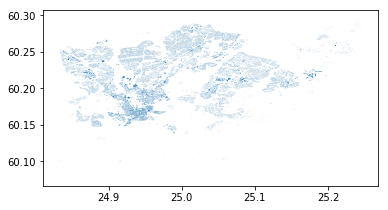

In [1]:
import osmnx as ox
import geopandas as gp
from geopy.geocoders.osm import Nominatim
from shapely.geometry import Point, Polygon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

buildings = ox.buildings_from_place("Helsinki, Finland")
buildings.plot()


In [2]:
buildings.columns

Index(['3dr:height1', '3dr:type', 'FIXME', 'FIXME:levels', 'FIXMEoperator',
       'abandoned:amenity', 'access', 'addr:city', 'addr:country',
       'addr:flats',
       ...
       'wheelchair', 'wheelchair:description', 'wholesale', 'wifi', 'wikidata',
       'wikipedia', 'wikipedia:en', 'year', 'year_on', 'year_on:approximate'],
      dtype='object', length=500)

In [3]:
buildings[buildings['description'].notnull()]['description']


13780270                                       Vesivoimalaitos
14099216                                           huoltoasema
14462165                                        Puutavarahalli
14462317                                     Planmecan varasto
14462332                                         Starkin halli
14463220                                        autonpesuhalli
14580703                                  Ratsupoliisien talli
15802490                                             pukukopit
16085371                                        entinen Elanto
21286362     Merkkihuoltovaltuudet: - Mercedes-Benz - Volks...
22904565                                           parkkihalli
22969372                                            Autopesula
23174782     Wholesale in e.g. parfyms and cosmetics. Estab...
23174786                                           kivinavetta
24406503           Kehitysvammaisten nuorten elämävalmennusta.
24764695     Vihitty käyttöön 28. toukokuuta 1905, rait

In [4]:
buildings[buildings['amenity'].notnull()]['amenity']


6189301        public_building
6269033        social_facility
8034126                theatre
8041428                 clinic
8097296                 school
8597256       place_of_worship
10528156            veterinary
13779794                clinic
13859034       social_facility
14437628                school
14437817          kindergarten
14437989      place_of_worship
14463220              car_wash
14463247             fast_food
14463902          fire_station
14831236               parking
15090769          leikkipuisto
15090778      place_of_worship
15216881      place_of_worship
15242906            restaurant
15242921      place_of_worship
15242942     conference_centre
15802367      place_of_worship
15802445          kindergarten
15802447             childcare
15802647               parking
15920017            university
15920021            university
16083419                school
16085371          kindergarten
                   ...        
577745374       waste_disposal
57774538

In [5]:
buildings[buildings['amenity'] == 'restaurant']

,3dr:height1,3dr:type,FIXME,FIXME:levels,FIXMEoperator,abandoned:amenity,access,addr:city,addr:country,addr:flats,...,wheelchair,wheelchair:description,wholesale,wifi,wikidata,wikipedia,wikipedia:en,year,year_on,year_on:approximate
15242906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Helsinki,FI,NaN,...,NaN,NaN,NaN,NaN,Q6375016,fi:Katajanokan Kasino,NaN,NaN,NaN,NaN
17038654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,helsinki,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17039604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23815666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Helsinki,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24904043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26257345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26936530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28739860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Helsinki,NaN,NaN,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31785988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Helsinki,NaN,NaN,...,limited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34714712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
buildings['amenity'].unique()

array([nan, 'public_building', 'social_facility', 'theatre', 'clinic',
       'school', 'place_of_worship', 'veterinary', 'kindergarten',
       'car_wash', 'fast_food', 'fire_station', 'parking', 'leikkipuisto',
       'restaurant', 'conference_centre', 'childcare', 'university',
       'community_centre', 'preschool', 'shelter', 'ferry_terminal',
       'library', 'embassy', 'car_rental', 'bank', 'doctors', 'recycling',
       'fuel', 'bandstand', 'cafe', 'pub', 'music_school', 'crematorium',
       'townhall', 'hospital', 'college', 'arts_centre', 'waste_disposal',
       'nursing_home', 'fuel;car_wash', 'studio', 'exhibition_center',
       'sauna', 'police', 'dentist', 'house_movals', 'shower', 'toilets',
       'club', 'bicycle_parking', 'dressing_room', 'events_venue',
       'changing_room', 'nightclub', 'ice_cream', 'courthouse',
       'fuel;restaurant;car_wash', 'parliament', 'bbq', 'bar',
       'waste_basket', 'swimming_pool'], dtype=object)

In [7]:
buildings[buildings['name'].notnull()]['name']

4252923                               Uimastadion
4254163                            Hartwall Arena
4254310                                     Talli
4254311                                Vaunuhalli
4260855                 Arctech Helsinki Shipyard
4260901                      Hernesaaren jäähalli
4261024                               Fordin talo
4268713                     Talin jalkapallohalli
4432166                     Posti lajittelukeskus
5369288                               Digia Tower
5369294                                       ABB
6183586                             Liikuntamylly
6186794                                Megahertsi
6188230                      K-Supermarket Hertta
6188896                         Kauppakeskus Itis
6189301         Stoa (Itäkeskuksen monitoimitalo)
6189460                     Myllypuron Pallomylly
6267260                                  A-lehdet
6268325                                  Lanterna
6269033                              Iiris-keskus


In [8]:
gc = Nominatim(user_agent="testing")

In [16]:
location = gc.geocode("Pohjolankatu 16, Helsinki", geometry='geojson')
location



Location(16, Pohjolankatu, Käpylä, Helsinki, Helsingin seutukunta, Uusimaa, Etelä-Suomi, Manner-Suomi, 00610, Suomi, (60.2149632, 24.94752825, 0.0))

In [10]:
bbox = ox.core.bbox_from_point(location)
bbox

(24.95654868407702, 24.93850780345498, 60.224857142180454, 60.2050693560969)

In [11]:
topleft = (bbox[0], bbox[2])
topright = (bbox[0], bbox[3])
bottomleft = (bbox[1], bbox[2])
bottomright = (bbox[1], bbox[3])
bbox_polygon = Polygon([topleft, topright, bottomright, bottomleft])
gdf = gp.GeoDataFrame(gp.GeoSeries(bbox_polygon), columns=['geometry'])
gdf


,geometry
0,"POLYGON ((24.95654868407702 60.22485714218045,..."


In [12]:
#intersections = gp.overlay(buildings, gdf, how='intersection')
#intersections.plot()

In [24]:
df = pd.read_csv("Pysakointivirheet.csv", encoding='ISO-8859-1')
df = df[df['Osoite'].notnull()]
df = df[df['Osoite'] != '-']
df
df['Osoite'] = df['Osoite'].apply(lambda x: x + ", Helsinki")
#df['coords'] = df['Osoite'].apply(lambda x: gc.geocode(x))
#df['coords'] = df['coords'].apply(lambda x: (x.latitude, x.longitude))
df['Osoite'].unique().shape

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(17203,)

In [20]:
df['coords']

KeyError: 'coords'